In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/elena/astrocosmolib/')

from pyACC.fits_wrapper import FitsManager
from astropy.cosmology import LambdaCDM 
from astropy import units as u

In [ ]:
#set up different cosmologies
fiducial_cosmology = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

#Astropy ritorna le unità di misura
redshift =1
dc = fiducial_cosmology.comoving_distance(redshift)
dc.to(u.km)


<Quantity 1.01945505e+23 km>

In [3]:
vipers_sample = FitsManager('VIPERS_W1_SPECTRO_PDR2.fits.gz')
vipers_sample.get_hdu_count()
vipers_sample.get_header(1)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   91 / width of table in bytes                        
NAXIS2  =                60528 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   16 / number of fields in each row                   
TTYPE1  = 'id_IAU  '           / label for field   1                            
TFORM1  = '16A     '           / data format of field: ASCII Character          
TTYPE2  = 'num     '           / label for field   2                            
TFORM2  = '9A      '           / data format of field: ASCII Character          
TTYPE3  = 'alpha   '        

In [4]:
data = vipers_sample.get_data(1)

alpha, delta, redshift = data["alpha"], data["delta"], data["zspec"]
zflg = data["zflg"]

cut_zspec = np.where((redshift > 0.3) & (redshift < 1.5) & (zflg>=2) & (zflg <= 9))[0]

len(cut_zspec), len(redshift)

(48428, 60528)

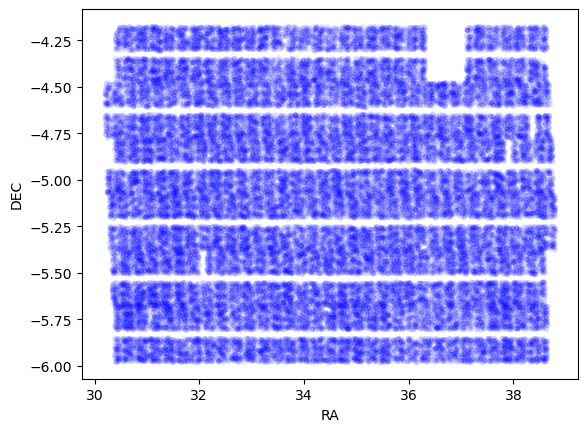

In [5]:
# Plot the angular distribution of galaxies

plt.plot(alpha, delta, 'b.', alpha=0.05)
plt.xlabel("RA")
plt.ylabel("DEC")
plt.show()

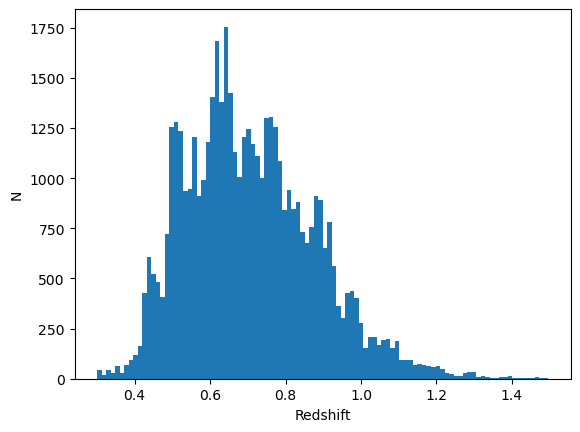

In [6]:
# Plot N(z)

plt.hist(redshift[cut_zspec], bins =100)
plt.xlabel("Redshift")
plt.ylabel("N")
plt.show()

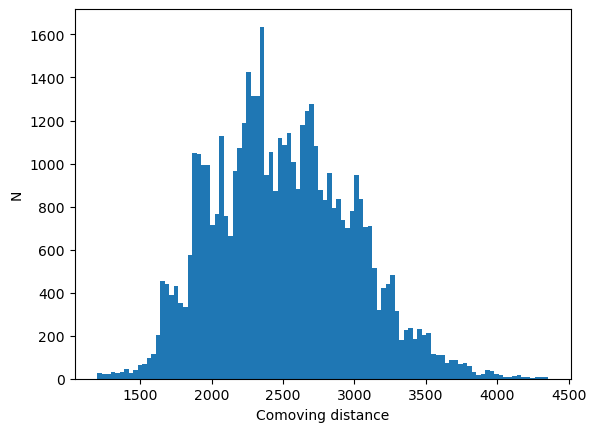

In [8]:
# Plot N(comoving distance)

dc = fiducial_cosmology.comoving_distance(redshift[cut_zspec])

plt.hist(dc, bins =100)
plt.xlabel("Comoving distance")
plt.ylabel("N")
plt.show()

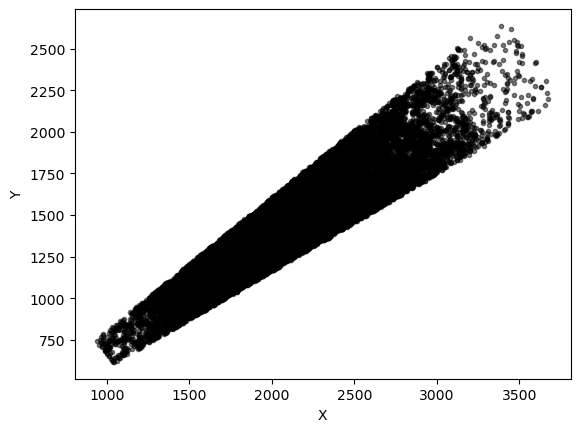

In [9]:
fiducial_cosmology_2 = LambdaCDM(H0=70, Om0=0.5, Ode0=0.5)

dc = fiducial_cosmology.comoving_distance(redshift[cut_zspec])

X = dc*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
Y = dc*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
Z = dc*np.sin(np.radians(delta[cut_zspec]))

plt.plot(X, Y, 'k.', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [10]:
# cosmologie diverse cambiano le coordinate cartesiane, non quelle angolari
fiducial_cosmology_2 = LambdaCDM(H0=70, Om0=0.5, Ode0=0.5)

dc_2 = fiducial_cosmology_2.comoving_distance(redshift[cut_zspec])

# (non uso la classe ComovingDistance
X_2 = dc_2*np.cos(np.radians(delta[cut_zspec]))*np.cos(np.radians(alpha[cut_zspec]))
Y_2 = dc_2*np.cos(np.radians(delta[cut_zspec]))*np.sin(np.radians(alpha[cut_zspec]))
Z_2 = dc_2*np.sin(np.radians(delta[cut_zspec]))


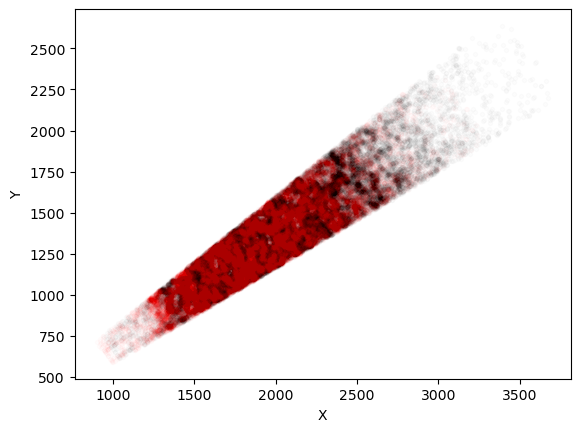

In [11]:
#Plot cosmologie sovrapposte

plt.plot(X, Y, 'k.', alpha =0.01)
plt.plot(X_2, Y_2, 'r.', alpha =0.01)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<>:24: SyntaxWarning: invalid escape sequence '\O'
<>:24: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_2843/2656304519.py:24: SyntaxWarning: invalid escape sequence '\O'
  ax[1,1].hist(dc_2, bins=100, color="r", alpha=0.5, label="$\Omega_M=0.5$")


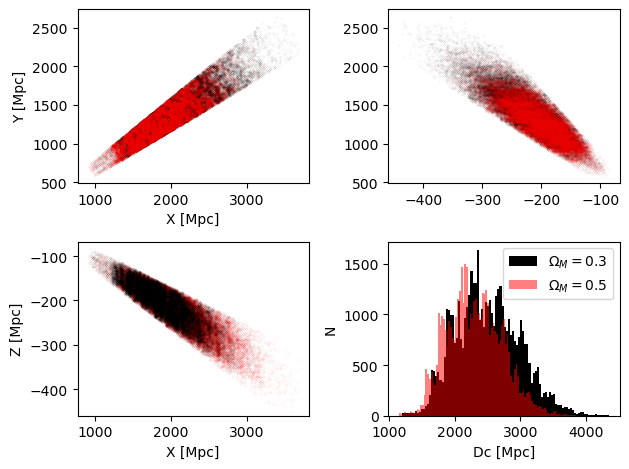

In [12]:
# Plot cosmologie sovrapposte (nero -> cosmologia 1, rosso -> cosmologia 2)

figure, ax = plt.subplots(2, 2)

ax[0,0].plot(X, Y, ".", ms=0.05, color="k")
ax[0,0].plot(X_2, Y_2, ".", ms=0.05, color="r")

ax[0,0].set_xlabel("X [Mpc]")
ax[0,0].set_ylabel("Y [Mpc]")

ax[0,1].plot(Z, Y, ".", ms=0.05, color="k")
ax[0,1].plot(Z_2, Y_2, ".", ms=0.05, color="r")

ax[1,0].set_xlabel("Z [Mpc]")
ax[1,0].set_ylabel("Y [Mpc]")

ax[1,0].plot(X, Z, ".", ms=0.05, color="r")
ax[1,0].plot(X_2, Z_2, ".", ms=0.05, color="k")

ax[1,0].set_xlabel("X [Mpc]")
ax[1,0].set_ylabel("Z [Mpc]")

ax[1,1].hist(dc, bins=100, color="k", label=r"$\Omega_M=0.3$")
ax[1,1].hist(dc_2, bins=100, color="r", alpha=0.5, label="$\Omega_M=0.5$")

ax[1,1].set_xlabel("Dc [Mpc]")
ax[1,1].set_ylabel("N")

ax[1,1].legend()

figure.tight_layout()